In [1]:
!pwd

/content


In [2]:
#changing the working directory and entering to dataset directory for my google drive
%cd drive/MyDrive/kaggle/image_classification/

/content/drive/MyDrive/kaggle/image_classification


In [3]:
%cd flower_classification/

/content/drive/MyDrive/kaggle/image_classification/flower_classification


In [4]:
!ls

AccVal_acc.png	LossVal_loss.png  test	train


In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [7]:
train_path = 'train'
valid_path = 'test'

In [8]:
# add preprocessing layer to the front of InceptionV3
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

In [10]:
# useful for getting number of classes
folders = glob('train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 3027 images belonging to 5 classes.


In [17]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 1296 images belonging to 5 classes.


In [18]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
48/48 [==============================] - 2253s 46s/step - loss: 3.3518 - accuracy: 0.6842 - val_loss: 1.7846 - val_accuracy: 0.7461
Epoch 2/4
48/48 [==============================] - 51s 1s/step - loss: 0.8527 - accuracy: 0.8540 - val_loss: 1.7257 - val_accuracy: 0.7315
Epoch 3/4
48/48 [==============================] - 50s 1s/step - loss: 0.5895 - accuracy: 0.8870 - val_loss: 1.4101 - val_accuracy: 0.8056
Epoch 4/4
48/48 [==============================] - 50s 1s/step - loss: 0.4719 - accuracy: 0.8946 - val_loss: 1.6204 - val_accuracy: 0.7577


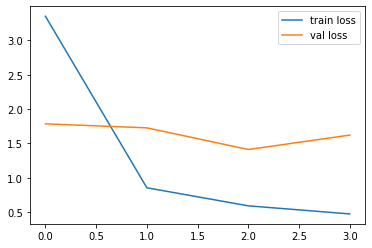

<Figure size 432x288 with 0 Axes>

In [19]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

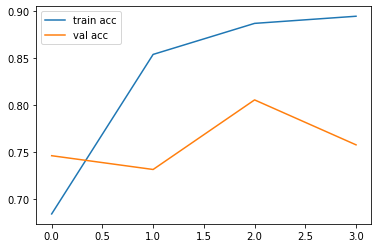

<Figure size 432x288 with 0 Axes>

In [20]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')